### 1.	Perform combined over and undersampling on the diabetes dataset (use SMOTEENN). Explain how combined sampling works.

#### SMOTE-ENN:

(Start of SMOTE: Synthetic Minority Oversampling Technique) 

Determine K, as the number of nearest neighbors

Choose random data from the minority class.

Find it's K nearest neighbors.

A chose a neighbor randomly from the K nearest neighbors and create a synthetic example of the minority class at a randomly selected point between the two examples in feature space..

Repeat until the desired proportion of minority class is met. 
(End of SMOTE)

(Start of ENN) 
Determine K, as the number of nearest neighbors. If not determined, then K=3.

Choose an observation randomly.

Find the K-nearest neighbor of the observation and return the majority class from the K-nearest neighbor.

If the class of the observation and the majority class from the observation’s K-nearest neighbor is different, then all are deleted from the dataset

Repeat  until the desired proportion of each class is fulfilled.
(End of ENN)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.combine import SMOTEENN

In [2]:
data=pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
y=data['Outcome']
X=data.drop('Outcome',axis=1)

y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [4]:
resample = SMOTEENN()
X, y = resample.fit_resample(X, y)

y.value_counts()

1    295
0    230
Name: Outcome, dtype: int64

Now the data is balanced

### 2.	Perform logistic regression with the new data from question 1. 

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[94  8]
 [ 9 99]]


In [7]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       102
           1       0.93      0.92      0.92       108

    accuracy                           0.92       210
   macro avg       0.92      0.92      0.92       210
weighted avg       0.92      0.92      0.92       210



#### a.	Comment on the performance of combined sampling vs the other approaches we have used for the diabetes dataset.

The most important metric for us in this case is recall, because we are doing resampling in order to better understand the positive (undersampled) outcome (has diabetes). When we did SMOTE only, there was a significant improvement in recall of positives (from 0.52 to 0.73) after resampling, even though recall of negatives suffered as a result. Using SMOTEENN, both precision and recall of positives as well as negatives improved and more importantly, much more significantly for the positives (prec: 0.66 to 0.92, rec: 0.52 to 0.93), providing much better training fro diagnosis.

### 3.	Create an ROC Curve for the model https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc-curve.html and calculate the AUC. 

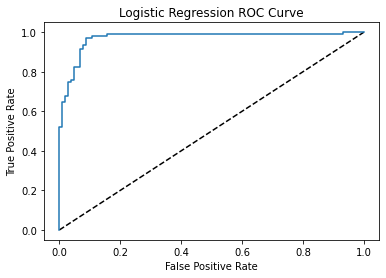

In [8]:
# logistic regression default streshold is 0.5
# varying the threshold gives the ROC Curve (Receiver Operator Characteristic)

from sklearn.metrics import roc_curve
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
_= plt.plot([0, 1], [0, 1], 'k--')
_= plt.plot(fpr, tpr, label = 'Logistic Regression')
_= plt.xlabel('False Positive Rate')
_= plt.ylabel('True Positive Rate')
_= plt.title('Logistic Regression ROC Curve')
plt.show()

In [9]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_prob)

0.9703159041394336

#### a.	BRIEFLY explain what the ROC Curve shows and what the resulting AUC means. 

ROC (Receiver Operating Characteristic): when predicting in a (binary) logistic regression, the streshold (to distinguish between positives and negatives) is usually set at 0.5. It can be set at any value between 0 and 1, though and if so then both the true positive rate and false positive rate change. If we plot these two, then we get the ROC curve, which illustrates the diagnostic ability of the system. Random guessing would set the curve on the diagonal, so anything above is better than random guessing and as such the bigger the area under the curve (AUC), the better the prediction system.

### 4.	What is outlier detection? Why is it useful? What methods can you use for outlier detection?

Outliers are observations that lie very far from other observations. Can be both point or collective outliers (the latter might point to a different phenomenon behind the observations as the rest of the data). Outlier detection is the ability to recognize outliers in data and is important both to detect possible errors in data collection or to detect new phenomena.

The method for outlier detection will depend on the data we are working with. Some of the most common methods:

- Z-Score or Extreme Value Analysis 
- Probabilistic and Statistical Modeling 
- Linear Regression Models (PCA, LMS)
- Proximity Based Models 
- Information Theory Models
- High Dimensional Outlier Detection Methods

#### The simplest method is based on Z-score:
Determine how many standard deviations from the mean the data points are, establish a streshold and classify data points above that streshold as outliers.

### 5.	Perform a linear SVM to predict credit approval (last column) using this dataset: https://archive.ics.uci.edu/ml/datasets/Statlog+%28Australian+Credit+Approval%29 . Make sure you look at the accompanying document that describes the data in the dat file.

In [10]:
raw = pd.read_table('australian.dat', delim_whitespace=True, names=['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15'])
raw.head(2)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0


In [11]:
X = raw.drop(columns = 'A15')
y = raw['A15']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [12]:
from sklearn.svm import SVC

# Instantiate an SVM
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

#### a.	How did the SVM model perform? 

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        96
           1       0.81      0.86      0.84        77

    accuracy                           0.85       173
   macro avg       0.85      0.85      0.85       173
weighted avg       0.85      0.85      0.85       173



Precision and recall are both reasonable (above 0.8) for positives as well as negatives, but the model took several minutes to fit even without optimizing hyperparameters.

### 6.	What kinds of jobs in data are you most interested in? Do some research on what is out there. Write about your thoughts in under 400 words.

Data scientist or machine learning engineer.

Generally speaking I would look for jobs where I would need to more heavily develop mathematical skills and could build on my scientific background (maybe somewhere in the chemical or medical field) as well as my predisposition for analytical thinking. I certainly prefer more abstraction and challenges on the creative side. At the same time I realize I have a long way to go to acquire the necessary mathematical, programming and software engineering skills

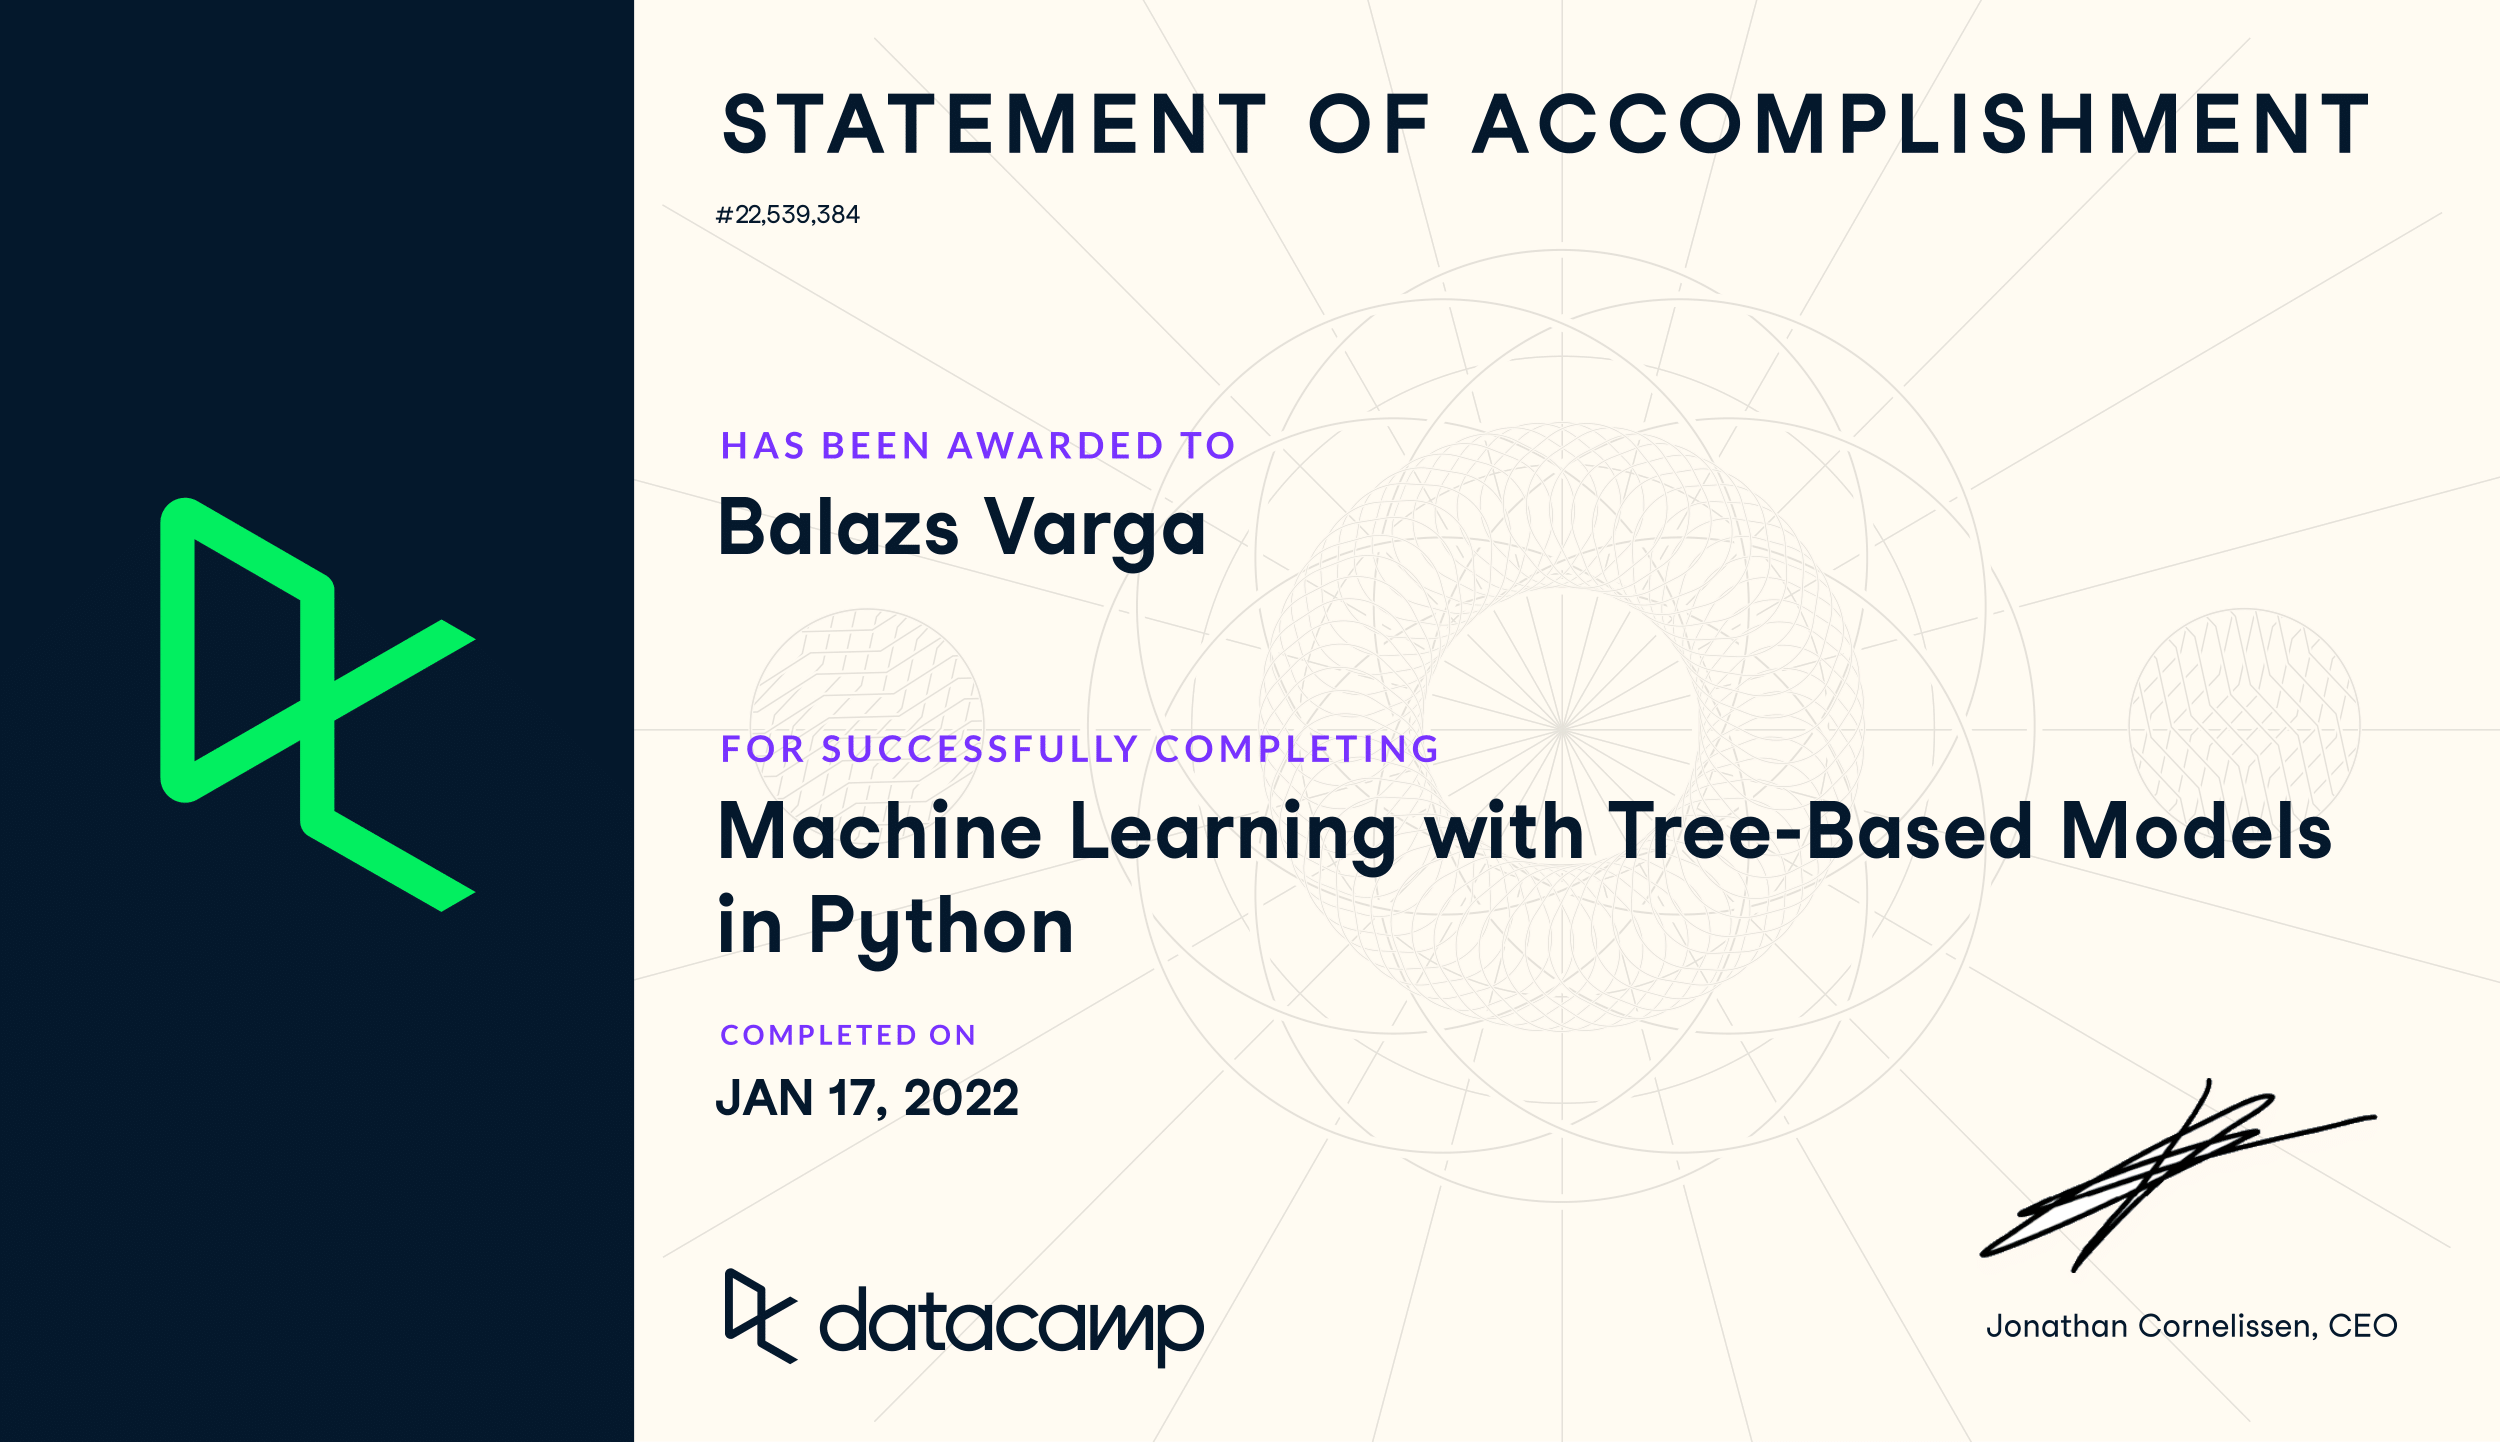

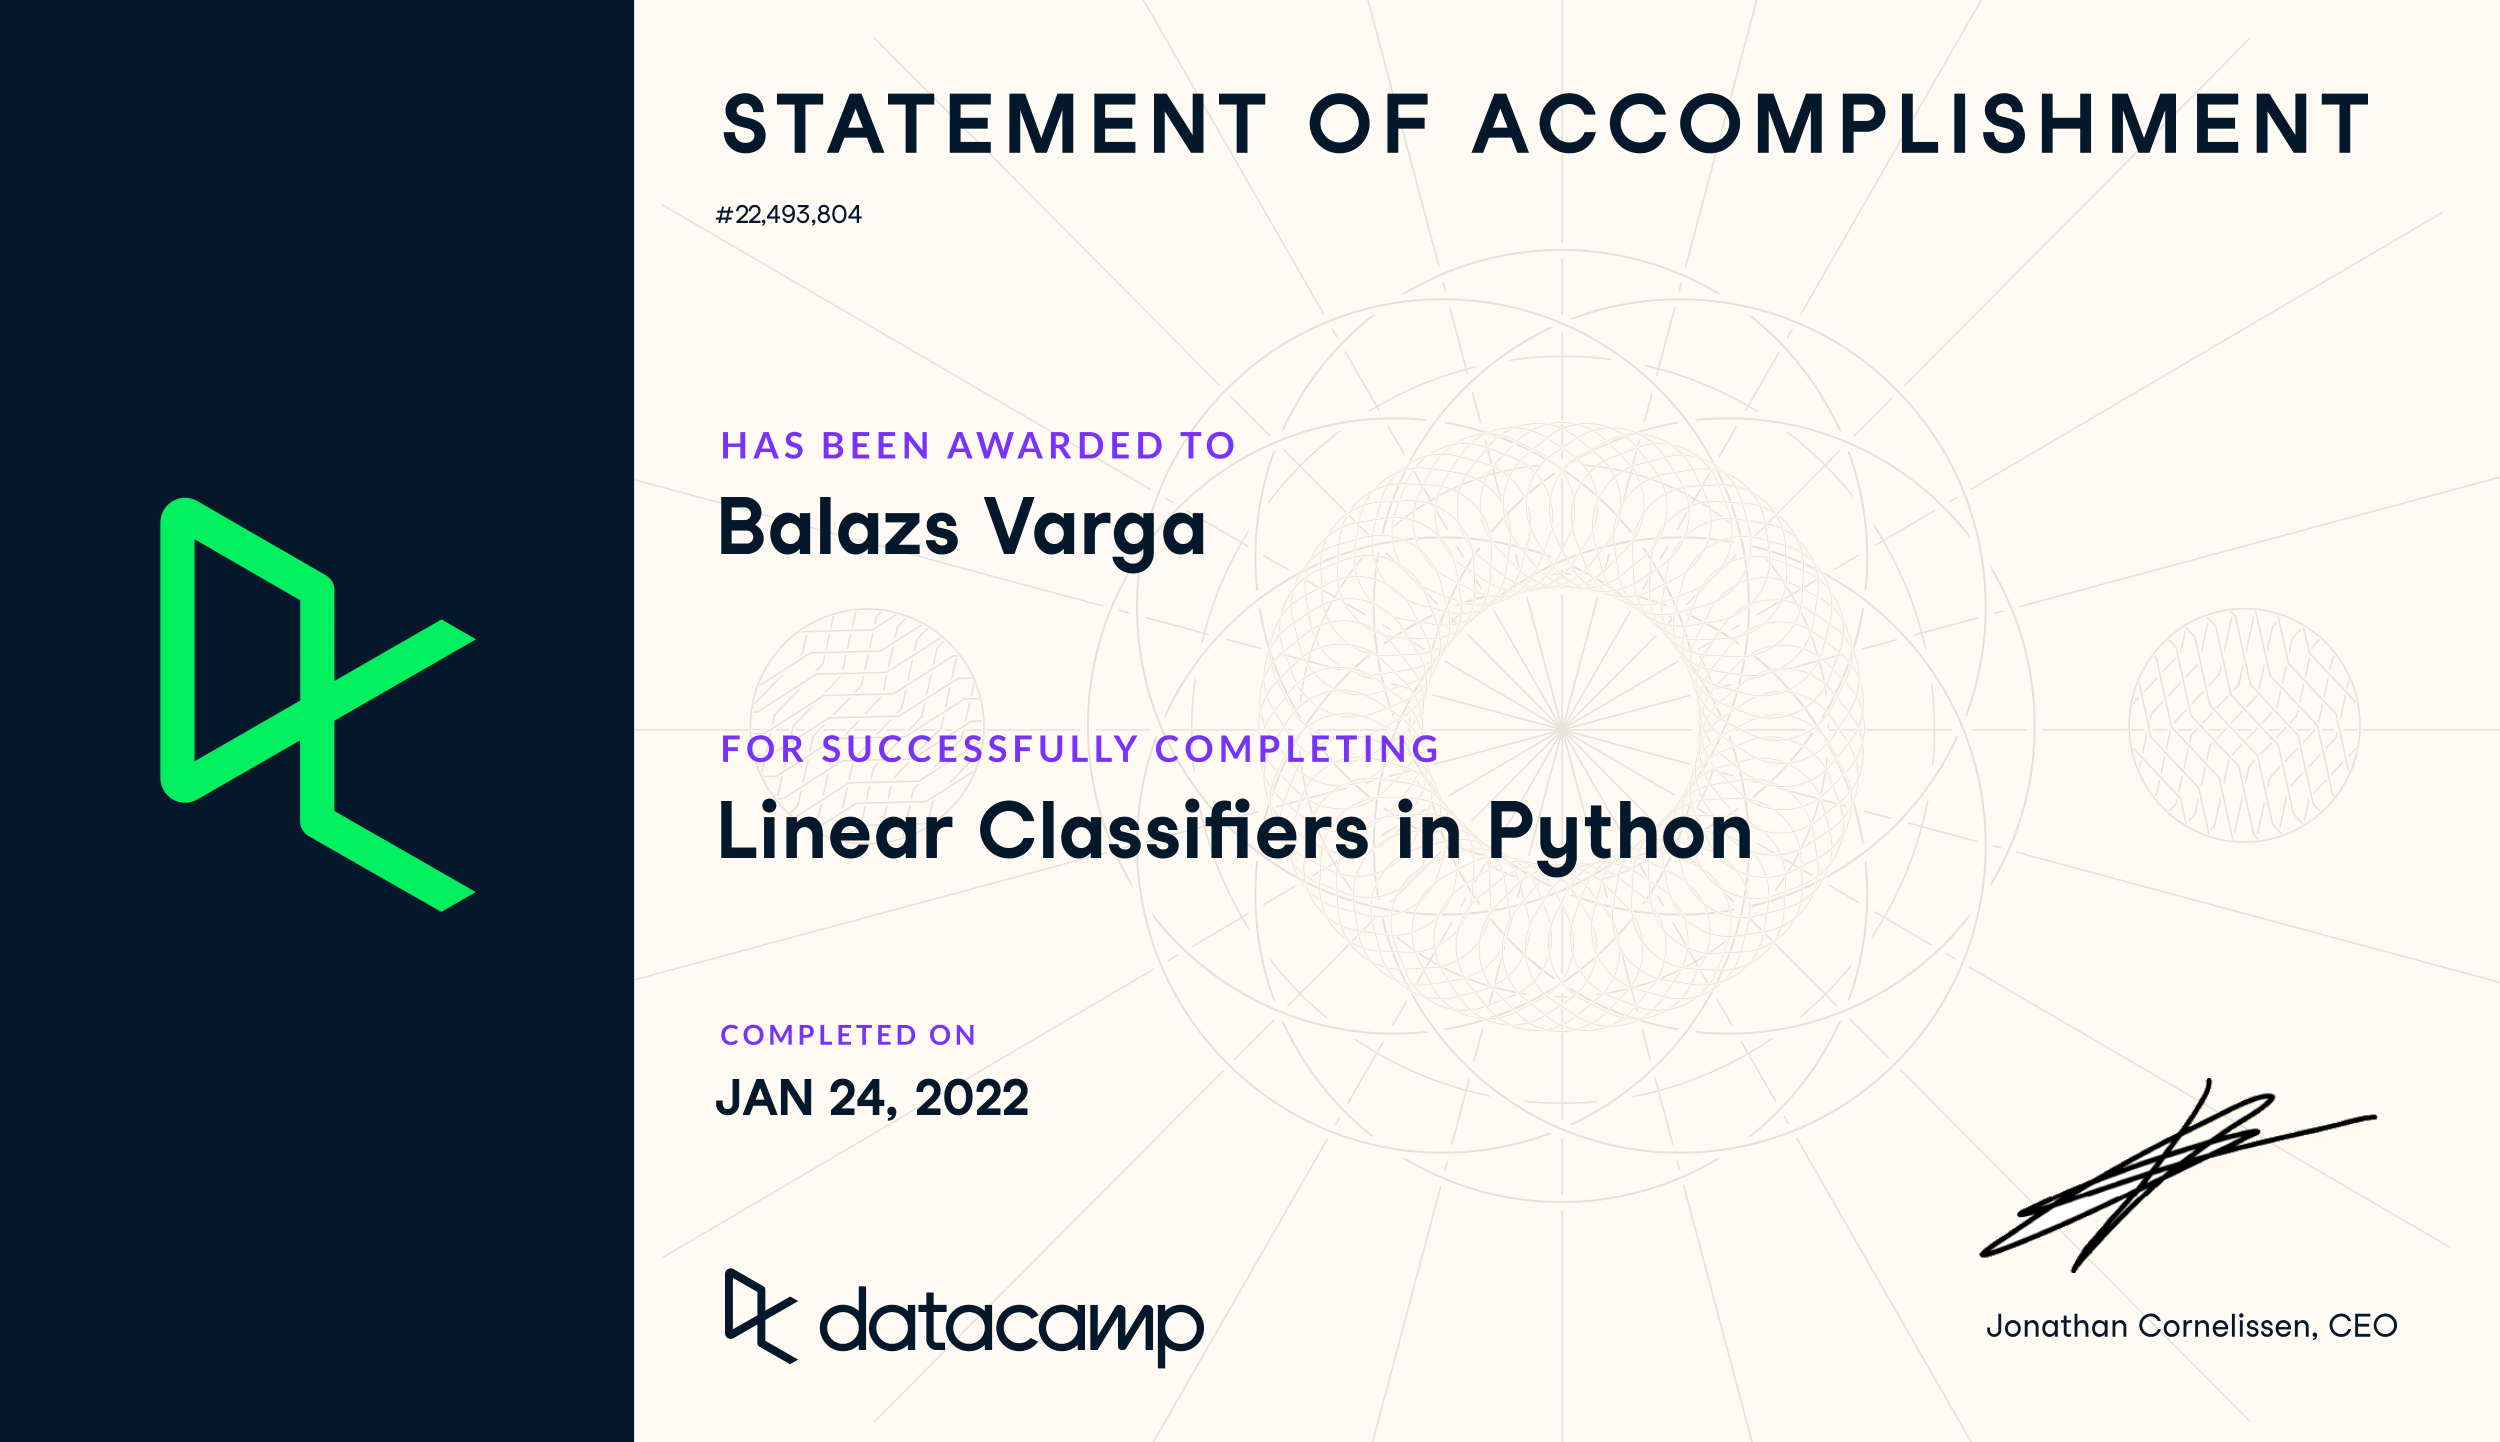